In [1]:
# COVID API UK Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Loading the file

In [3]:
df_for_cleaning = pd.read_csv(r'../4_integrated_csv_files/covid_19_api_data/17_03_2020_29_11_2024_GBR.csv')


## 3. Inspecting the dataset

#### Basic info about the dataset

In [5]:
df_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17608 non-null  object 
 1   confirmed       17608 non-null  int64  
 2   deaths          17608 non-null  int64  
 3   recovered       17608 non-null  int64  
 4   confirmed_diff  17608 non-null  int64  
 5   deaths_diff     17608 non-null  int64  
 6   recovered_diff  17608 non-null  int64  
 7   last_update     17608 non-null  object 
 8   active          17608 non-null  int64  
 9   active_diff     17608 non-null  int64  
 10  fatality_rate   17608 non-null  float64
 11  iso             17608 non-null  object 
 12  name            17608 non-null  object 
 13  province        17527 non-null  object 
 14  lat             16606 non-null  float64
 15  long            16606 non-null  float64
 16  cities          17608 non-null  object 
dtypes: float64(3), int64(8), object

#### Checking the top rows of the dataframe

In [6]:
df_for_cleaning.head()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long,cities
0,2020-03-17,6,0,0,0,0,0,2020-03-16 14:38:45,6,0,0.0000,GBR,United Kingdom,Channel Islands,49.3723,-2.3644,[]
1,2020-03-17,3,0,1,2,0,0,2020-03-17 02:53:03,2,2,0.0000,GBR,United Kingdom,Gibraltar,36.1408,-5.3536,[]
2,2020-03-17,1950,55,52,407,0,32,2020-03-17 15:13:09,1843,375,0.0282,GBR,United Kingdom,United Kingdom,55.3781,-3.4360,[]
3,2020-03-17,1,1,0,0,0,0,2020-03-16 14:53:04,0,0,1.0000,GBR,United Kingdom,Cayman Islands,19.3133,-81.2546,[]
4,2020-03-18,6,0,0,0,0,0,2020-03-16 14:38:45,6,0,0.0000,GBR,United Kingdom,Channel Islands,49.3723,-2.3644,[]


#### ... and the tail

In [7]:
df_for_cleaning.tail()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long,cities
17603,2023-03-09,898118,11500,0,577,14,0,2023-03-10 04:21:03,886618,563,0.0128,GBR,United Kingdom,Wales,52.130700,-3.78370,[]
17604,2023-03-09,2166,0,0,0,0,0,2023-03-10 04:21:03,2166,0,0.0000,GBR,United Kingdom,"Saint Helena, Ascension and Tristan da Cunha",-7.946700,-14.35590,[]
17605,2023-03-09,34991,66,0,0,0,0,2023-03-10 04:21:03,34925,0,0.0019,GBR,United Kingdom,Guernsey,49.448196,-2.58949,[]
17606,2023-03-09,66391,161,0,0,0,0,2023-03-10 04:21:03,66230,0,0.0024,GBR,United Kingdom,Jersey,49.213800,-2.13580,[]
17607,2023-03-09,4,0,0,0,0,0,2023-03-10 04:21:03,4,0,0.0000,GBR,United Kingdom,Pitcairn Islands,-24.376800,-128.32420,[]


#### ... and a random sample of 10

In [11]:
df_for_cleaning.sample(10)

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long,cities
1744,2020-08-07,597,47,533,0,0,0,2020-08-08 04:34:53,17,0,0.0787,GBR,United Kingdom,Channel Islands,49.3723,-2.3644,[]
12539,2022-06-10,4,0,0,0,0,0,2022-06-11 04:21:01,4,0,0.0000,GBR,United Kingdom,"Saint Helena, Ascension and Tristan da Cunha",-7.9467,-14.3559,[]
4131,2021-01-13,362,2,325,0,0,9,2021-01-14 05:22:32,35,-9,0.0055,GBR,United Kingdom,Cayman Islands,19.3133,-81.2546,[]
5805,2021-04-30,194,1,191,0,0,2,2021-05-01 04:20:47,2,-2,0.0052,GBR,United Kingdom,British Virgin Islands,18.4207,-64.6400,[]
15175,2022-11-01,4,0,0,0,0,0,2022-11-02 04:22:09,4,0,0.0000,GBR,United Kingdom,Pitcairn Islands,-24.3768,-128.3242,[]
5780,2021-04-28,211389,5548,0,35,0,0,2021-04-29 04:20:55,205841,35,0.0262,GBR,United Kingdom,Wales,52.1307,-3.7837,[]
10823,2022-03-07,115,0,0,0,0,0,2022-03-08 04:20:54,115,0,0.0000,GBR,United Kingdom,Falkland Islands (Malvinas),-51.7963,-59.5236,[]
928,2020-06-13,13,0,13,0,0,0,2020-06-14 03:33:15,0,0,0.0000,GBR,United Kingdom,Falkland Islands (Malvinas),-51.7963,-59.5236,[]
11864,2022-05-04,2788,9,0,0,0,0,2022-05-05 04:20:55,2779,0,0.0032,GBR,United Kingdom,Anguilla,18.2206,-63.0686,[]
4179,2021-01-16,419,25,354,1,0,0,2021-01-17 05:22:17,40,1,0.0597,GBR,United Kingdom,Isle of Man,54.2361,-4.5481,[]


#### Checking the shape of the dataframe

In [13]:
print(df_for_cleaning.shape)

(17608, 17)


In [14]:
#### Getting information about number of columns, their names and data types
df_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17608 non-null  object 
 1   confirmed       17608 non-null  int64  
 2   deaths          17608 non-null  int64  
 3   recovered       17608 non-null  int64  
 4   confirmed_diff  17608 non-null  int64  
 5   deaths_diff     17608 non-null  int64  
 6   recovered_diff  17608 non-null  int64  
 7   last_update     17608 non-null  object 
 8   active          17608 non-null  int64  
 9   active_diff     17608 non-null  int64  
 10  fatality_rate   17608 non-null  float64
 11  iso             17608 non-null  object 
 12  name            17608 non-null  object 
 13  province        17527 non-null  object 
 14  lat             16606 non-null  float64
 15  long            16606 non-null  float64
 16  cities          17608 non-null  object 
dtypes: float64(3), int64(8), object

#### Summary statistics of numerical columns

In [16]:
df_for_cleaning.describe()

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate,lat,long
count,1.760800e+04,17608.000000,17608.000000,1.760800e+04,17608.000000,17608.000000,1.760800e+04,1.760800e+04,17608.000000,16606.000000,16606.000000
mean,6.887615e+05,8008.836097,195.766583,1.397846e+03,12.528510,0.001249,6.805569e+05,1.385316e+03,0.016801,29.070707,-34.232911
std,3.014491e+06,29901.767630,700.347598,3.129884e+04,220.230472,86.537538,2.986532e+06,3.111973e+04,0.030857,28.138310,32.648595
min,0.000000e+00,0.000000,0.000000,-1.943263e+06,-12211.000000,-8322.000000,-3.390000e+02,-1.931052e+06,0.000000,-51.796300,-128.324200
25%,9.775000e+01,1.000000,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00,0.000000e+00,0.001000,18.420700,-64.640000
50%,3.459500e+03,33.000000,0.000000,0.000000e+00,0.000000,0.000000,2.586000e+03,0.000000e+00,0.006400,32.307800,-14.355900
75%,3.492900e+04,152.000000,8.000000,1.100000e+01,0.000000,0.000000,3.480100e+04,7.000000e+00,0.016700,52.355500,-4.202600
max,2.065618e+07,186138.000000,8322.000000,1.943263e+06,12211.000000,1712.000000,2.047004e+07,1.931052e+06,1.000000,56.490700,-1.174300


#### Check for missing values

In [17]:
df_for_cleaning.isnull().sum()

date                 0
confirmed            0
deaths               0
recovered            0
confirmed_diff       0
deaths_diff          0
recovered_diff       0
last_update          0
active               0
active_diff          0
fatality_rate        0
iso                  0
name                 0
province            81
lat               1002
long              1002
cities               0
dtype: int64

#### Check for duplicate rows

In [19]:
df_for_cleaning.duplicated().sum()

np.int64(0)

#### Visualize missing values

<Axes: >

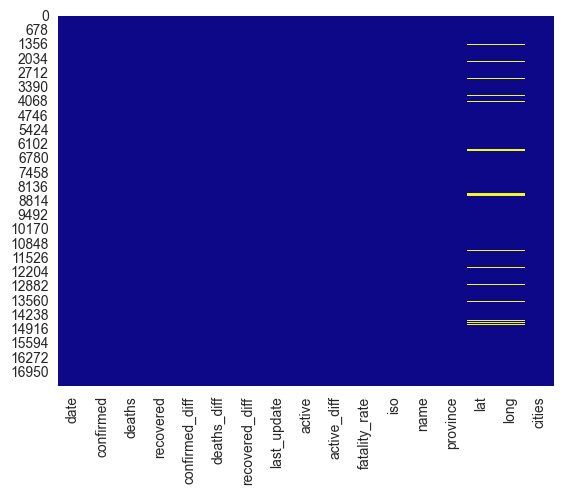

In [21]:
sns.heatmap(df_for_cleaning.isnull(), cbar=False, cmap='plasma')

#### From the inspection I have a clear plan of what is required. I need to first filter the data to only contain UK constituent country data as this matches my other dataset, I do not need the latitued and longitude column, I would like the data to be conglomerated to show UK cases/mortality data for that particular day. I have no need for latitude and longitude, cities or province columns, whilst there are missing data in this dataset for these values, they are not required for my analysis so I will not need to handle data in these columns. 

In [47]:
df_filtered = df_for_cleaning[df_for_cleaning['province'].isin(['England', 'Scotland', 'Northern Ireland', 'Wales'])]

In [48]:
columns_to_keep = ['date', 'confirmed', 'deaths', 'recovered', 'confirmed_diff', 'deaths_diff', 'recovered_diff', 'active', 'active_diff', 'fatality_rate']

In [49]:
df_filtered = df_filtered[columns_to_keep]

In [50]:
df_filtered = df_filtered.groupby('date').sum().reset_index('date')

## 4. Handling Missing Data
### Confirming no null data is present

In [51]:
df_filtered.isnull().sum()

date              0
confirmed         0
deaths            0
recovered         0
confirmed_diff    0
deaths_diff       0
recovered_diff    0
active            0
active_diff       0
fatality_rate     0
dtype: int64

## 5. Handling Duplicates
#### Again there are no duplicates to handle

In [53]:
df_filtered.duplicated().sum()

np.int64(0)

## 6. Data Type Conversion

In [56]:
df_filtered.dtypes

date               object
confirmed           int64
deaths              int64
recovered           int64
confirmed_diff      int64
deaths_diff         int64
recovered_diff      int64
active              int64
active_diff         int64
fatality_rate     float64
dtype: object

#### Aside from the date, all other columns are appropriately formatted. I will therefore format the date

In [59]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

#### Confirming the datatype conversion

In [60]:
df_filtered.dtypes

date              datetime64[ns]
confirmed                  int64
deaths                     int64
recovered                  int64
confirmed_diff             int64
deaths_diff                int64
recovered_diff             int64
active                     int64
active_diff                int64
fatality_rate            float64
dtype: object

#### The dataset for comparison only has data from 2020 until the end of 2021 so I therefore limit the filtered dataframe to these parameters

In [101]:
start_date = '2020-06-11'
end_date = '2021-11-01'
df_date_filtered = df_filtered[(df_filtered['date'] >= start_date) & (df_filtered['date'] <= end_date)]

## 7. Handling Outliers

In [102]:
numerical_columns = df_date_filtered.select_dtypes(include=['number']).columns.tolist()

In [103]:
numerical_columns

['confirmed',
 'deaths',
 'recovered',
 'confirmed_diff',
 'deaths_diff',
 'recovered_diff',
 'active',
 'active_diff',
 'fatality_rate']

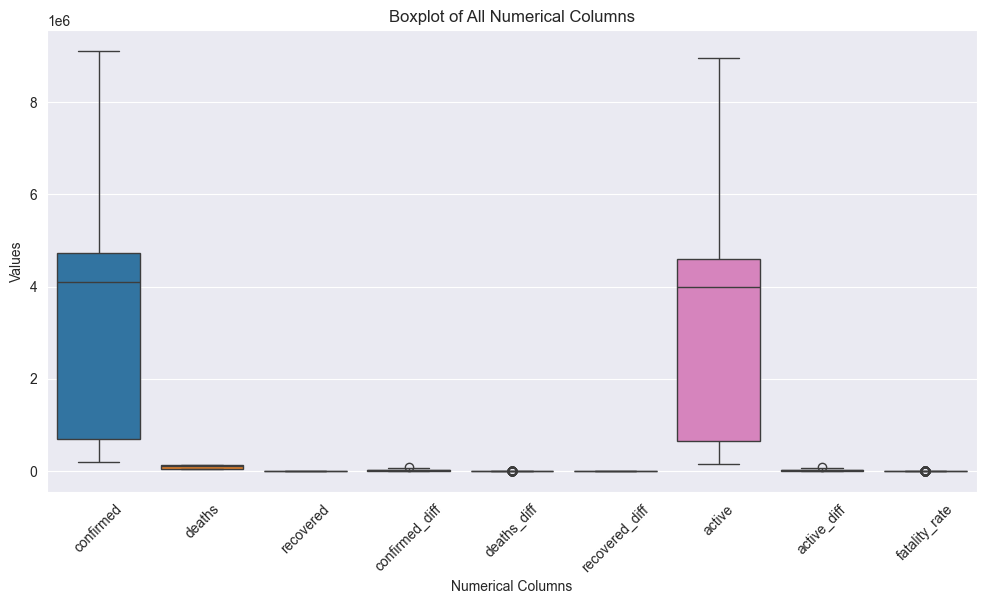

In [104]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_date_filtered[numerical_columns])
plt.title("Boxplot of All Numerical Columns")
plt.xlabel("Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

#### Although I initially opted to leave the outliers in due to the nature of the pandemic and the box plot seeming reasonable. There was a clear erroneous datapoint for this data in June 2020. This was skewing the visualisations and limiting obtaining valuble insight I therefore returned to the dataset and opted to handle the outliers by using the quintile method to cap the outliers which is more appropriate for this type of data

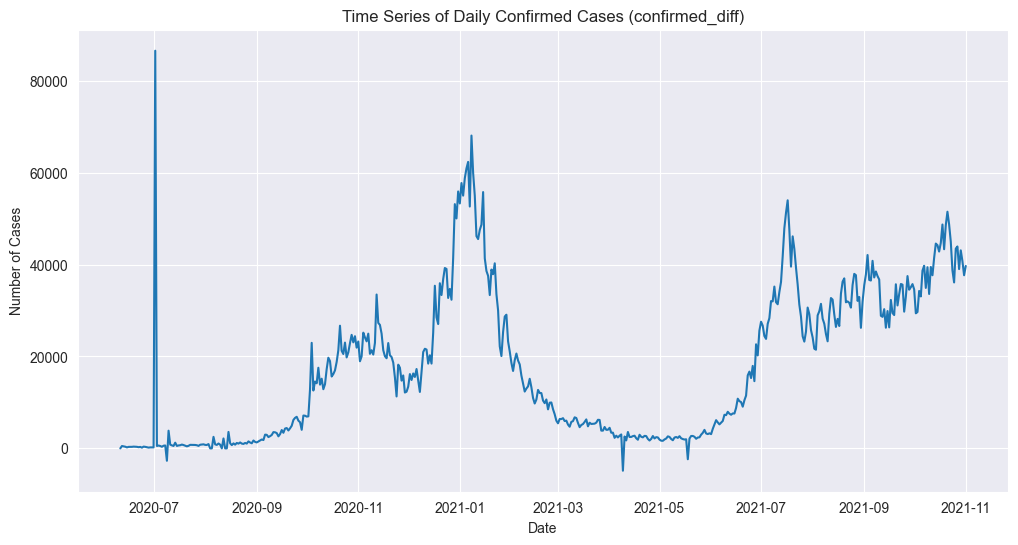

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(df_date_filtered['date'], df_date_filtered['confirmed_diff'], label='Daily Confirmed Cases')

plt.title("Time Series of Daily Confirmed Cases (confirmed_diff)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")

plt.show()

In [109]:
lower_percentile = df_date_filtered['confirmed_diff'].quantile(0.01)
upper_percentile = df_date_filtered['confirmed_diff'].quantile(0.99)
cases_dataframe = df_date_filtered.ffill()
df_filtered_outliers_removed = cases_dataframe[
    (cases_dataframe['confirmed_diff'] >= lower_percentile) & (cases_dataframe['confirmed_diff'] <= upper_percentile)]

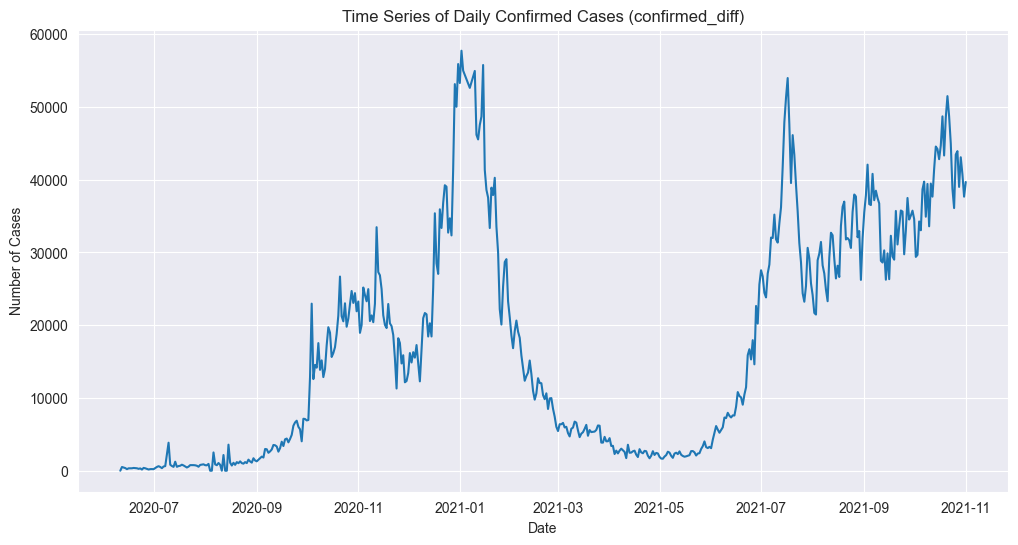

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered_outliers_removed['date'], df_filtered_outliers_removed['confirmed_diff'], label='Daily Confirmed Cases')

plt.title("Time Series of Daily Confirmed Cases (confirmed_diff)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")

plt.show()

#### This looks significantly better! I will therefore review this cleaned, filtered dataset and save the output to file.

## 10. Final Review and Summary

In [111]:
df_filtered_outliers_removed

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
0,2020-06-11,191103,41279,0,0,0,0,149824,0,0.6007
1,2020-06-12,191615,41481,0,512,202,0,150134,310,0.6014
2,2020-06-13,192056,41662,0,441,181,0,150394,260,0.6020
3,2020-06-14,192419,41698,0,363,36,0,150721,327,0.6022
4,2020-06-15,192636,41736,0,217,38,0,150900,179,0.6025
...,...,...,...,...,...,...,...,...,...,...
504,2021-10-28,8936155,140206,0,39006,165,0,8795949,38841,0.0546
505,2021-10-29,8979236,140392,0,43081,186,0,8838844,42895,0.0543
506,2021-10-30,9019962,140558,0,40726,166,0,8879404,40560,0.0542
507,2021-10-31,9057629,140632,0,37667,74,0,8916997,37593,0.0539


In [112]:
df_filtered_outliers_removed.isnull().sum()

date              0
confirmed         0
deaths            0
recovered         0
confirmed_diff    0
deaths_diff       0
recovered_diff    0
active            0
active_diff       0
fatality_rate     0
dtype: int64

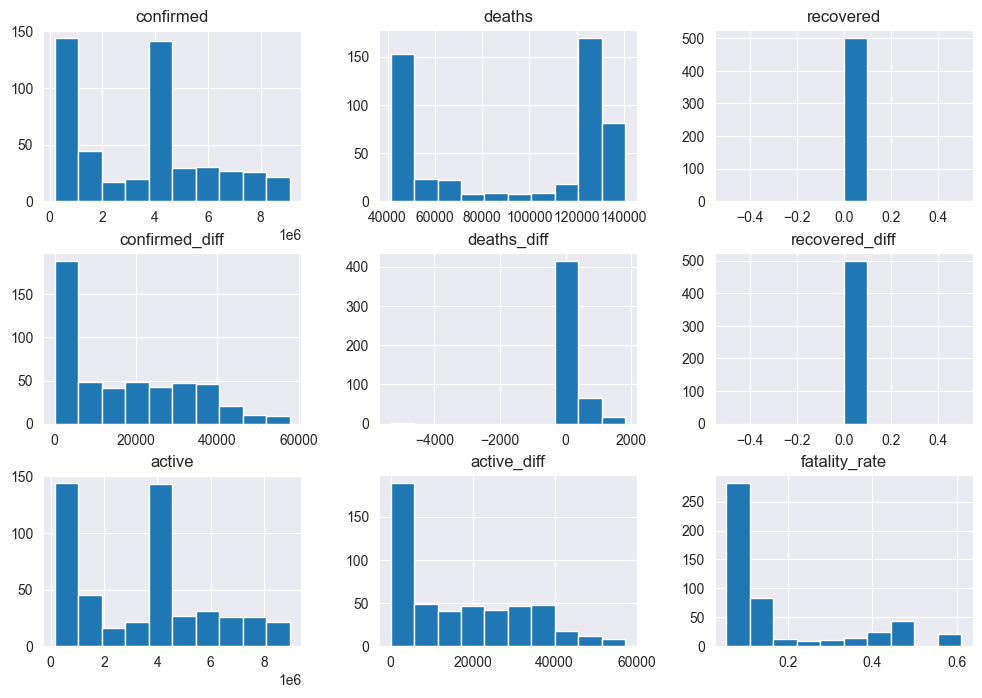

In [123]:
df_filtered_outliers_removed.iloc[:, 1:].hist(figsize=(12, 8))
plt.show()

## 11. Saving Cleaned Data

In [124]:
df_filtered_outliers_removed.to_csv(r'../6_cleaned_files/covid_api_data/covid_api_uk_cleaned.csv', index=False)